In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# 밑에 실행하면서 뜨는 빨간 경고 팝업 뜨지 않게 하기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import koreanize_matplotlib

# 환율정보 DB에서 추출하기

In [3]:
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb

<function pymysql.install_as_MySQLdb()>

In [4]:
# MySQL 연결 설정 ver 1
connection = pymysql.connect(
    host='localhost',    # MySQL 서버 주소 (로컬 호스트)
    user='root',         # MySQL 사용자 이름 (root)
    password='1234',  # MySQL 비밀번호를 입력하세요
    database='korea_exchange_rate',  # 사용할 데이터베이스 이름
    port=3306,           # MySQL 기본 포트 번호
    charset='utf8mb4'
)

# 쿼리 실행 및 데이터 가져오기
query = "SELECT * FROM exchange_rate"  # 테이블의 모든 데이터를 가져오는 쿼리
exchange_rate= pd.read_sql(query, connection)

# MySQL 연결 종료
connection.close()

# 데이터 출력
print(exchange_rate.head())


C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\3607813990.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exchange_rate= pd.read_sql(query, connection)


         date            통화  현찰_살때_환율  현찰_살때_Spread  현찰_팔때_환율  현찰_팔때_Spread  \
0  1995-01-03        미국 USD    800.53           1.5    776.87           1.5   
1  1995-01-03  일본 JPY (100)    798.89           1.5    775.29           1.5   
2  1995-01-03        유로 EUR      0.00           0.0      0.00           0.0   
3  1995-01-03        중국 CNY      0.00           0.0      0.00           0.0   
4  1995-01-03        홍콩 HKD    103.45           3.0    100.41           3.0   

   송금_보낼때  송금_받을때  T/C_살때  외화_수표_팔때   매매기준율  환가_료율  미화 환산율  
0  791.80  785.60  792.64      0.00  788.70   0.00  1.0000  
1  791.81  782.37  792.59      0.00  787.09   0.00  0.9980  
2  975.40  959.92    0.00    957.94  967.66   7.37  1.2269  
3   94.12    0.00    0.00      0.00   93.38   1.00  0.1184  
4  102.74  101.12    0.00      0.00  101.93   0.00  0.1292  


In [5]:
exchange_rate.head(3)

,date,통화,현찰_살때_환율,현찰_살때_Spread,현찰_팔때_환율,현찰_팔때_Spread,송금_보낼때,송금_받을때,T/C_살때,외화_수표_팔때,매매기준율,환가_료율,미화 환산율
0,1995-01-03,미국 USD,800.53,1.5,776.87,1.5,791.80,785.60,792.64,0.00,788.70,0.00,1.0000
1,1995-01-03,일본 JPY (100),798.89,1.5,775.29,1.5,791.81,782.37,792.59,0.00,787.09,0.00,0.9980
2,1995-01-03,유로 EUR,0.00,0.0,0.00,0.0,975.40,959.92,0.00,957.94,967.66,7.37,1.2269


In [6]:
exchange_rate = exchange_rate.loc[(exchange_rate['date'] >= '1999-01-01') & (exchange_rate['통화']=='미국 USD'), ['date', '통화', '현찰_살때_환율']]
exchange_rate.head(7)

# 1999-01-01 부터
# 미국 통화만
# 현찰 살때 환율만

,date,통화,현찰_살때_환율
40128,1999-01-01,미국 USD,1233.49
40150,1999-01-04,미국 USD,1215.56
40172,1999-01-05,미국 USD,1193.54
40194,1999-01-06,미국 USD,1185.85
40216,1999-01-07,미국 USD,1178.17
40238,1999-01-08,미국 USD,1203.78
40260,1999-01-11,미국 USD,1203.78


In [7]:
exchange_rate = exchange_rate.reset_index(drop=True)
exchange_rate.head(7)

# 인덱스를 0부터 다시 할당하는 과정 : reset_index

,date,통화,현찰_살때_환율
0,1999-01-01,미국 USD,1233.49
1,1999-01-04,미국 USD,1215.56
2,1999-01-05,미국 USD,1193.54
3,1999-01-06,미국 USD,1185.85
4,1999-01-07,미국 USD,1178.17
5,1999-01-08,미국 USD,1203.78
6,1999-01-11,미국 USD,1203.78


# 금리 데이터 불러오기

In [9]:
interest_rate = pd.read_csv("./mini_project/기준금리1999-2023.csv")
interest_rate

,변경일자,Unnamed: 1,기준금리
0,2023,01월 13일,3.50
1,2022,11월 24일,3.25
2,2022,10월 12일,3.00
3,2022,08월 25일,2.50
4,2022,07월 13일,2.25
5,2022,05월 26일,1.75
6,2022,04월 14일,1.50
7,2022,01월 14일,1.25
8,2021,11월 25일,1.00
9,2021,08월 26일,0.75


In [9]:
#interest_rate.columns = ['연도', '월일', '기준금리']
#interest_rate.head()

In [10]:
# 1열(연도)과 2열(월, 일)을 합쳐서 새로운 '변경일자' 열을 생성
interest_rate['변경일자'] = interest_rate.iloc[:, 0].astype(str) + ' ' + interest_rate.iloc[:, 1].astype(str)

# '변경일자'를 datetime 형식으로 변환
interest_rate['변경일자'] = pd.to_datetime(interest_rate['변경일자'], format='%Y %m월 %d일', errors='coerce')

# 2열(월/일) 삭제
interest_rate = interest_rate.drop(interest_rate.columns[1], axis=1)

# 최종 데이터프레임 확인
print(interest_rate.head())

        변경일자  기준금리
0 2023-01-13  3.50
1 2022-11-24  3.25
2 2022-10-12  3.00
3 2022-08-25  2.50
4 2022-07-13  2.25


In [11]:
interest_rate.head()

,변경일자,기준금리
0,2023-01-13,3.50
1,2022-11-24,3.25
2,2022-10-12,3.00
3,2022-08-25,2.50
4,2022-07-13,2.25


# 전국 주소 정보 - 우체국 전국 우편번호 데이터

In [12]:
# glob은 경로상에 있는 모든 파일 경로를 리스트로 만들어줌
from glob import glob

In [13]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

In [15]:
address_path = glob("./mini_project/zipcode_DB/*.txt")
address_path

# * : 별을 붙이면 전체를 의미함. 

['./mini_project/zipcode_DB\\강원특별자치도.txt',
 './mini_project/zipcode_DB\\경기도.txt',
 './mini_project/zipcode_DB\\경상남도.txt',
 './mini_project/zipcode_DB\\경상북도.txt',
 './mini_project/zipcode_DB\\광주광역시.txt',
 './mini_project/zipcode_DB\\대구광역시.txt',
 './mini_project/zipcode_DB\\대전광역시.txt',
 './mini_project/zipcode_DB\\부산광역시.txt',
 './mini_project/zipcode_DB\\서울특별시.txt',
 './mini_project/zipcode_DB\\세종특별자치시.txt',
 './mini_project/zipcode_DB\\울산광역시.txt',
 './mini_project/zipcode_DB\\인천광역시.txt',
 './mini_project/zipcode_DB\\전라남도.txt',
 './mini_project/zipcode_DB\\전북특별자치도.txt',
 './mini_project/zipcode_DB\\제주특별자치도.txt',
 './mini_project/zipcode_DB\\충청남도.txt',
 './mini_project/zipcode_DB\\충청북도.txt']

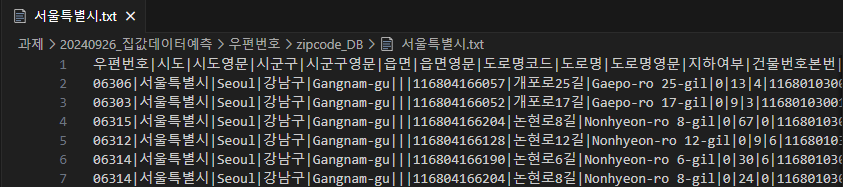


In [16]:
address_df = pd.DataFrame()
for area in address_path:
    temp = pd.read_csv(area, sep = "|")
    address_df = pd.concat([address_df, temp])
    
address_df.head(3)

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\1715185019.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(area, sep = "|")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\1715185019.py:3: DtypeWarning: Columns (5,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(area, sep = "|")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\1715185019.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(area, sep = "|")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\1715185019.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(area, sep = "|")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\1715185019.py:3: DtypeWarning: Columns (5,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = p

,우편번호,시도,시도영문,시군구,시군구영문,읍면,읍면영문,도로명코드,도로명,도로명영문,...,법정동코드,법정동명,리명,행정동명,산여부,지번본번,읍면동일련번호,지번부번,구우편번호,우편번호일련번호
0,25627,강원특별자치도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,511503220033,임곡로,Imgok-ro,...,5115034022,NaN,모전리,강동면,0,45,1,3,NaN,NaN
1,25627,강원특별자치도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,511504460489,산두양지길,Sanduyangji-gil,...,5115034022,NaN,모전리,강동면,0,85,1,13,NaN,NaN
2,25627,강원특별자치도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,511504460489,산두양지길,Sanduyangji-gil,...,5115034022,NaN,모전리,강동면,0,85,1,12,NaN,NaN


In [17]:
address_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6428174 entries, 0 to 336852
Data columns (total 26 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   우편번호      6428174 non-null  int64  
 1   시도        6428174 non-null  object 
 2   시도영문      6428174 non-null  object 
 3   시군구       6400502 non-null  object 
 4   시군구영문     6400502 non-null  object 
 5   읍면        3491357 non-null  object 
 6   읍면영문      3491357 non-null  object 
 7   도로명코드     6428174 non-null  int64  
 8   도로명       6428174 non-null  object 
 9   도로명영문     6428174 non-null  object 
 10  지하여부      6428174 non-null  int64  
 11  건물번호본번    6428174 non-null  int64  
 12  건물번호부번    6428174 non-null  int64  
 13  건물관리번호    6428174 non-null  object 
 14  다량배달처명    0 non-null        float64
 15  시군구용건물명   713321 non-null   object 
 16  법정동코드     6428174 non-null  int64  
 17  법정동명      2936817 non-null  object 
 18  리명        3491357 non-null  object 
 19  행정동명      6182083 non-null 

법정동명 --> 법적이기 때문에 법정동명으로 사용하기 

In [18]:
address_df.columns

Index(['우편번호', '시도', '시도영문', '시군구', '시군구영문', '읍면', '읍면영문', '도로명코드', '도로명',
       '도로명영문', '지하여부', '건물번호본번', '건물번호부번', '건물관리번호', '다량배달처명', '시군구용건물명',
       '법정동코드', '법정동명', '리명', '행정동명', '산여부', '지번본번', '읍면동일련번호', '지번부번',
       '구우편번호', '우편번호일련번호'],
      dtype='object')

In [19]:
address_df = address_df[['우편번호', '시도','시군구','법정동명', '읍면', '리명']]
address_df.head()

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,NaN,강동면,모전리
1,25627,강원특별자치도,강릉시,NaN,강동면,모전리
2,25627,강원특별자치도,강릉시,NaN,강동면,모전리
3,25627,강원특별자치도,강릉시,NaN,강동면,모전리
4,25627,강원특별자치도,강릉시,NaN,강동면,모전리


### 우편번호 중복 제거하기 drop_duplicates(subset = ['기준칼럼'])

In [20]:
address_df = address_df.drop_duplicates(subset=['우편번호'])
address_df.head()

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,NaN,강동면,모전리
402,25630,강원특별자치도,강릉시,NaN,강동면,산성우리
627,25620,강원특별자치도,강릉시,NaN,강동면,상시동리
878,25632,강원특별자치도,강릉시,NaN,강동면,심곡리
1125,25626,강원특별자치도,강릉시,NaN,강동면,안인진리


In [21]:
address_df = address_df.reset_index(drop=True)
address_df.head()

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,NaN,강동면,모전리
1,25630,강원특별자치도,강릉시,NaN,강동면,산성우리
2,25620,강원특별자치도,강릉시,NaN,강동면,상시동리
3,25632,강원특별자치도,강릉시,NaN,강동면,심곡리
4,25626,강원특별자치도,강릉시,NaN,강동면,안인진리


In [22]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34382 entries, 0 to 34381
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   우편번호    34382 non-null  int64 
 1   시도      34382 non-null  object
 2   시군구     34229 non-null  object
 3   법정동명    24286 non-null  object
 4   읍면      10096 non-null  object
 5   리명      10096 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [23]:
address_df = address_df.fillna(" ")  # 없는 데이터는 그냥 공백으로 두기
address_df.info()

# 결측값 처리 완료

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34382 entries, 0 to 34381
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   우편번호    34382 non-null  int64 
 1   시도      34382 non-null  object
 2   시군구     34382 non-null  object
 3   법정동명    34382 non-null  object
 4   읍면      34382 non-null  object
 5   리명      34382 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [24]:
address_df.head()

# 없는 데이터는 그냥 공백으로 변경 완료
# NaN --> "  "

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,,강동면,모전리
1,25630,강원특별자치도,강릉시,,강동면,산성우리
2,25620,강원특별자치도,강릉시,,강동면,상시동리
3,25632,강원특별자치도,강릉시,,강동면,심곡리
4,25626,강원특별자치도,강릉시,,강동면,안인진리


### 구우편번호 데이터 불러와 합치기 

In [25]:
old_address_df = pd.read_excel("./mini_project/zipcode_DB/20150707_우편번호(기존형태).xls", header = [0,1])
old_address_df.head(3)

우편번호               일련번호 주    소                       \
  Unnamed: 0_level_1 Unnamed: 1_level_1     시도  시군구  읍면동     리   도서   
0             210821                  1    강원도  강릉시  강동면   모전리  NaN   
1             210822                  1    강원도  강릉시  강동면  산성우리  NaN   
2             210821                 21    강원도  강릉시  강동면  상시동리  NaN   

                  번지            아파트/건물명                변경일              주    소  
  Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1 Unnamed: 10_level_1  
0                NaN                NaN           20040517     강원도 강릉시 강동면 모전리  
1                NaN                NaN           20040517    강원도 강릉시 강동면 산성우리  
2                NaN                NaN           20040517    강원도 강릉시 강동면 상시동리

In [26]:
old_address_df.columns

MultiIndex([(   '우편번호',  'Unnamed: 0_level_1'),
            (   '일련번호',  'Unnamed: 1_level_1'),
            ( '주    소',                  '시도'),
            ( '주    소',                 '시군구'),
            ( '주    소',                 '읍면동'),
            ( '주    소',                   '리'),
            ( '주    소',                  '도서'),
            (     '번지',  'Unnamed: 7_level_1'),
            ('아파트/건물명',  'Unnamed: 8_level_1'),
            (    '변경일',  'Unnamed: 9_level_1'),
            ( '주    소', 'Unnamed: 10_level_1')],
           )

In [27]:
old_address_df = old_address_df[[(   '우편번호',  'Unnamed: 0_level_1'),
            (   '일련번호',  'Unnamed: 1_level_1'),
            ( '주    소',                  '시도'),
            ( '주    소',                 '시군구'),
            ( '주    소',                 '읍면동'),
            ( '주    소',                   '리')]]

old_address_df.head()

우편번호               일련번호 주    소                
  Unnamed: 0_level_1 Unnamed: 1_level_1     시도  시군구  읍면동     리
0             210821                  1    강원도  강릉시  강동면   모전리
1             210822                  1    강원도  강릉시  강동면  산성우리
2             210821                 21    강원도  강릉시  강동면  상시동리
3             210822                 21    강원도  강릉시  강동면   심곡리
4             210824                 31    강원도  강릉시  강동면   안인리

In [28]:
old_address_df.columns = ['우편번호', '일련번호', '시도', '시군구', '읍면동', '리']
old_address_df.head()

,우편번호,일련번호,시도,시군구,읍면동,리
0,210821,1,강원도,강릉시,강동면,모전리
1,210822,1,강원도,강릉시,강동면,산성우리
2,210821,21,강원도,강릉시,강동면,상시동리
3,210822,21,강원도,강릉시,강동면,심곡리
4,210824,31,강원도,강릉시,강동면,안인리


In [29]:
old_address_df = old_address_df.drop('일련번호', axis = 1)
old_address_df.head()

# '일련번호' 칼럼 삭제

,우편번호,시도,시군구,읍면동,리
0,210821,강원도,강릉시,강동면,모전리
1,210822,강원도,강릉시,강동면,산성우리
2,210821,강원도,강릉시,강동면,상시동리
3,210822,강원도,강릉시,강동면,심곡리
4,210824,강원도,강릉시,강동면,안인리


In [30]:
old_address_df = old_address_df.drop_duplicates(subset='우편번호')
old_address_df.head()

# 중복값 삭제하기 

,우편번호,시도,시군구,읍면동,리
0,210821,강원도,강릉시,강동면,모전리
1,210822,강원도,강릉시,강동면,산성우리
4,210824,강원도,강릉시,강동면,안인리
12,210823,강원도,강릉시,강동면,하시동리
13,210820,강원도,강릉시,강동면,NaN


In [31]:
old_address_df = old_address_df.fillna(" ")
old_address_df.info()

# 결측치 처리 완료 

<class 'pandas.core.frame.DataFrame'>
Index: 32057 entries, 0 to 52839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   우편번호    32057 non-null  int64 
 1   시도      32057 non-null  object
 2   시군구     32057 non-null  object
 3   읍면동     32057 non-null  object
 4   리       32057 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
address_df

,우편번호,시도,시군구,법정동명,읍면,리명
0,25627,강원특별자치도,강릉시,,강동면,모전리
1,25630,강원특별자치도,강릉시,,강동면,산성우리
2,25620,강원특별자치도,강릉시,,강동면,상시동리
3,25632,강원특별자치도,강릉시,,강동면,심곡리
4,25626,강원특별자치도,강릉시,,강동면,안인진리
...,...,...,...,...,...,...
34377,27481,충청북도,충주시,호암동,,
34378,27415,충청북도,충주시,호암동,,
34379,27483,충청북도,충주시,호암동,,
34380,27480,충청북도,충주시,호암동,,


address_df 에서 '법정동명' + '읍면' 합쳐서 '읍면동'에 넣어야함. 

In [33]:
old_address_df

,우편번호,시도,시군구,읍면동,리
0,210821,강원도,강릉시,강동면,모전리
1,210822,강원도,강릉시,강동면,산성우리
4,210824,강원도,강릉시,강동면,안인리
12,210823,강원도,강릉시,강동면,하시동리
13,210820,강원도,강릉시,강동면,
...,...,...,...,...,...
52835,380763,충청북도,충주시,호암동,
52836,380967,충청북도,충주시,호암동,
52837,380966,충청북도,충주시,호암동,
52838,380130,충청북도,충주시,호암동,


In [34]:
address_df['읍면동'] = address_df['법정동명'] + address_df['읍면']
address_df

,우편번호,시도,시군구,법정동명,읍면,리명,읍면동
0,25627,강원특별자치도,강릉시,,강동면,모전리,강동면
1,25630,강원특별자치도,강릉시,,강동면,산성우리,강동면
2,25620,강원특별자치도,강릉시,,강동면,상시동리,강동면
3,25632,강원특별자치도,강릉시,,강동면,심곡리,강동면
4,25626,강원특별자치도,강릉시,,강동면,안인진리,강동면
...,...,...,...,...,...,...,...
34377,27481,충청북도,충주시,호암동,,,호암동
34378,27415,충청북도,충주시,호암동,,,호암동
34379,27483,충청북도,충주시,호암동,,,호암동
34380,27480,충청북도,충주시,호암동,,,호암동


In [35]:
address_df = address_df[['우편번호', '시도', '시군구','읍면동', '리명']]
address_df.head(3)

,우편번호,시도,시군구,읍면동,리명
0,25627,강원특별자치도,강릉시,강동면,모전리
1,25630,강원특별자치도,강릉시,강동면,산성우리
2,25620,강원특별자치도,강릉시,강동면,상시동리


In [36]:
# = address_df.drop(['법정동명','읍면'], axis=1)
#address_df.head(3)

In [37]:
address_df = address_df.rename(columns={"리명":"리"})
address_df.head()

,우편번호,시도,시군구,읍면동,리
0,25627,강원특별자치도,강릉시,강동면,모전리
1,25630,강원특별자치도,강릉시,강동면,산성우리
2,25620,강원특별자치도,강릉시,강동면,상시동리
3,25632,강원특별자치도,강릉시,강동면,심곡리
4,25626,강원특별자치도,강릉시,강동면,안인진리


# 전국 학원정보 불러오기 

In [38]:
academy =  pd.read_csv("./mini_project/학원교습소정보_2024년08월31일기준.csv", encoding='cp949')
academy.head(3)

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\4035990364.py:1: DtypeWarning: Columns (6,22) have mixed types. Specify dtype option on import or set low_memory=False.
  academy =  pd.read_csv("./mini_project/학원교습소정보_2024년08월31일기준.csv", encoding='cp949')


,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료내용,수강료공개여부,기숙사학원여부,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자
0,B10,서울특별시교육청,강남구,학원,3000040160,대치학원,20211111,20211111,개원,,...,보습·논술,보습·논술,,Y,N,서울특별시 강남구 삼성로 347,", 201호 (대치동, 대일빌딩)",6202,02-2135-7135,20240908
1,B10,서울특별시교육청,강남구,학원,3000039285,(A STUDIO)에이스튜디오학원,20210630,20210630,개원,,...,NaN,"연기(연극,뮤지컬,오페라)",,Y,N,서울특별시 강남구 논현로134길 5,", 5층, 6층 (논현동)",6052,02-6013-8112,20231018
2,B10,서울특별시교육청,강남구,학원,2531,(주)멘토르수학전문학원,19950804,19950804,개원,,...,"보습,",보습,,N,N,서울특별시 강남구 남부순환로 2927,", 501호 일부(대치동, 대치 클래시아)",6280,02-564-5002,20240428


In [39]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136616 entries, 0 to 136615
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   시도교육청코드     136616 non-null  object
 1   시도교육청명      136616 non-null  object
 2   행정구역명       136474 non-null  object
 3   학원교습소구분명    136616 non-null  object
 4   학원지정번호      136616 non-null  int64 
 5   학원명         136616 non-null  object
 6   개설일자        136616 non-null  object
 7   등록일자        136616 non-null  int64 
 8   등록상태명       136616 non-null  object
 9   휴원시작일자      136616 non-null  object
 10  휴원종료일자      136616 non-null  object
 11  정원합계        136616 non-null  int64 
 12  일시수용능력인원합계  136616 non-null  int64 
 13  분야명         136612 non-null  object
 14  교습계열명       119566 non-null  object
 15  교습과정목록명     99036 non-null   object
 16  교습과정명       119591 non-null  object
 17  인당수강료내용     136616 non-null  object
 18  수강료공개여부     136616 non-null  object
 19  기숙사학원여부     136616 non-

In [40]:
academy['시설도로명우편번호'] = academy['시설도로명우편번호'].apply(lambda x:str(x).strip())

In [41]:
old_address_df[old_address_df['우편번호']==135998]

,우편번호,시도,시군구,읍면동,리
29459,135998,서울특별시,강남구,대치4동,


In [42]:
address_df[address_df['우편번호']== 6207]

,우편번호,시도,시군구,읍면동,리
19518,6207,서울특별시,강남구,대치동,


In [43]:
academy['시설도로명상세주소'].unique()

array([', 201호 (대치동, 대일빌딩)', ', 5층, 6층 (논현동)', ', 501호 일부(대치동, 대치 클래시아)',
       ..., '1층(도평동)', '  4층 (연동)', ', 태광아파트 상가 102호 (이도일동)'],
      dtype=object)

In [44]:
for i in list(academy['시설도로명상세주소'].unique())[:100]:
    print(i)

, 201호 (대치동, 대일빌딩)
, 5층, 6층 (논현동)
, 501호 일부(대치동, 대치 클래시아)
, 1~4층 (대치동)
, 5층 (대치동, 대아빌딩)
, 2층, 5층 1호 (대치동, 타워엠프리스)
, 3층,4층 (대치동)
, 3층 301호 (역삼동)
, 1층 전체 (대치동)
 디마크빌딩 705 706호 (대치동)
, 4층 전체 (역삼동, KR타워)
, B동 4층 일부 (신사동,KT신사지사)
, 309호 (대치동)
, 3층 전체 (대치동)
, 203호 (대치동)
, 4층일부 (대치동)
5층(신사동)
, 2층 201호 (청담동, 피움빌딩)
, 402호 (청담동)
, 3층 301-1호 (대치동, 대치탑프라자)
  2층 (논현동)
, 2층202호 (도곡동)
, 3층 301호 (개포동, 삼성빌딩)
, 158호, 165호(대치동,한보종합상가)
, 2층 202호 (일원동, 우성7차아파트)
, 201호 (양재동, 서두빌딩)
, 지하1층일부 (논현동)
, 3층 3호,4호,5호, 4층 1호,2호,3호,4호,5호 (신사동)
, 4층 일부 (개포동, 오성빌딩)
, 1층 (논현동)
, 1층 전체 (일원동)
, 1층, 3층, 4층(대치동)
, 6층 전체 (신사동)
, 2층 204호 전체 (대치동, 대치현대아파트)
, B동 203-3호 (압구정동, 현대아파트)
, 2층 2호 및 3층 전체 (삼성동)
, 3층 전체 (청담동)
, 2층 (대치동)
, 3층 (신사동)
, 201호 (대치동)
, 5층 전체 (신사동)
, 2층 전체 (역삼동)
, 한솔상가 202호 (일원동, 한솔마을아파트)
, 207호 (일원동, 한솔마을상가동)
, 207호, 208호 (역삼동, 개나리아파트)
, 2층 4호,5호,13호,20호 (대치동,남서울종합상가)
, 403호 (신사동)
, 410호,411호 (반포동,래미안 퍼스티지 신반포역상가)
, 2층 (역삼동)
, 3,4층 (개포동)
, 5층일부 (대치동)
, 302호 (대치동)
, 3층 전체 (신사동)
, 4층 (역삼동)
, 2~3층 (논현동,BOB빌딩)
, 3

### 우편번호 패턴 파악

In [45]:
# 신우편번호 범위

print(address_df['우편번호'].min(), address_df['우편번호'].max())

1000 63644


In [46]:
# 구우편번호 범위

print(old_address_df['우편번호'].min(),old_address_df['우편번호'].max())

100011 799823


In [47]:
new_post_code_academies = academy[(academy['시설도로명우편번호'].str.len() >= 4) & (academy['시설도로명우편번호'].str.len() <= 5)]
new_post_code_academies.head(3)

# 신우편주소는 5자리

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료내용,수강료공개여부,기숙사학원여부,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자
0,B10,서울특별시교육청,강남구,학원,3000040160,대치학원,20211111,20211111,개원,,...,보습·논술,보습·논술,,Y,N,서울특별시 강남구 삼성로 347,", 201호 (대치동, 대일빌딩)",6202,02-2135-7135,20240908
1,B10,서울특별시교육청,강남구,학원,3000039285,(A STUDIO)에이스튜디오학원,20210630,20210630,개원,,...,NaN,"연기(연극,뮤지컬,오페라)",,Y,N,서울특별시 강남구 논현로134길 5,", 5층, 6층 (논현동)",6052,02-6013-8112,20231018
2,B10,서울특별시교육청,강남구,학원,2531,(주)멘토르수학전문학원,19950804,19950804,개원,,...,"보습,",보습,,N,N,서울특별시 강남구 남부순환로 2927,", 501호 일부(대치동, 대치 클래시아)",6280,02-564-5002,20240428


In [48]:
old_post_code_academies = academy[(academy['시설도로명우편번호'].str.len() == 6)]
old_post_code_academies.head(3)

# 구우편주소는 6자리였음

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료내용,수강료공개여부,기숙사학원여부,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자
3,B10,서울특별시교육청,강남구,학원,3000012704,(주)산에듀김영준국어논술전문별관학원,20110415,20110415,개원,,...,보습·논술,보습·논술,,N,N,서울특별시 강남구 선릉로62길 27,", 1~4층 (대치동)",135998,02-501-0575,20240908
9,B10,서울특별시교육청,강남구,학원,21034,(주)지이에스어학원,20080618,20080618,개원,,...,NaN,실용외국어(유아/초·중·고),,N,N,서울특별시 강남구 도곡로 408,디마크빌딩 705 706호 (대치동),135500,02-508-2445,20231018
11,B10,서울특별시교육청,강남구,학원,3000014569,(주)케이미디어텍학원,20120622,20120622,개원,,...,"보습,",NaN,,N,N,서울특별시 강남구 논현로 854,", B동 4층 일부 (신사동,KT신사지사)",135893,02-3448-4500,20231018


### 학원데이터 우편번호로 우편번호 데이터에서 주소 추출

In [49]:
new_post_code_academies.columns

Index(['시도교육청코드', '시도교육청명', '행정구역명', '학원교습소구분명', '학원지정번호', '학원명', '개설일자',
       '등록일자', '등록상태명', '휴원시작일자', '휴원종료일자', '정원합계', '일시수용능력인원합계', '분야명',
       '교습계열명', '교습과정목록명', '교습과정명', '인당수강료내용', '수강료공개여부', '기숙사학원여부', '시설도로명주소',
       '시설도로명상세주소', '시설도로명우편번호', '전화번호', '수정일자'],
      dtype='object')

In [50]:
new_post_code_academies['시설도로명우편번호']

0          6202
1          6052
2          6280
4          6207
5          6207
          ...  
136611    63201
136612    63247
136613    63291
136614    63247
136615    63237
Name: 시설도로명우편번호, Length: 109028, dtype: object

In [51]:
new_post_code_academies['시설도로명우편번호'] = new_post_code_academies['시설도로명우편번호'].astype(int)
new_post_code_academies['시설도로명우편번호'].dtype

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\2691967557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_post_code_academies['시설도로명우편번호'] = new_post_code_academies['시설도로명우편번호'].astype(int)


dtype('int32')

In [52]:
address_df['우편번호']

0        25627
1        25630
2        25620
3        25632
4        25626
         ...  
34377    27481
34378    27415
34379    27483
34380    27480
34381    27482
Name: 우편번호, Length: 34382, dtype: int64

#### address_df['우편번호'] 랑 new_post_code_academies['시설도로명우편번호'] 합치기

In [53]:
# address_df['우편번호'] 랑 new_post_code_academies['시설도로명우편번호'] 합치기


new_post_code_academies = pd.merge(new_post_code_academies, address_df, how='left', 
         left_on='시설도로명우편번호', right_on='우편번호')


new_post_code_academies

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자,우편번호,시도,시군구,읍면동,리
0,B10,서울특별시교육청,강남구,학원,3000040160,대치학원,20211111,20211111,개원,,...,서울특별시 강남구 삼성로 347,", 201호 (대치동, 대일빌딩)",6202,02-2135-7135,20240908,6202.0,서울특별시,강남구,대치동,
1,B10,서울특별시교육청,강남구,학원,3000039285,(A STUDIO)에이스튜디오학원,20210630,20210630,개원,,...,서울특별시 강남구 논현로134길 5,", 5층, 6층 (논현동)",6052,02-6013-8112,20231018,6052.0,서울특별시,강남구,논현동,
2,B10,서울특별시교육청,강남구,학원,2531,(주)멘토르수학전문학원,19950804,19950804,개원,,...,서울특별시 강남구 남부순환로 2927,", 501호 일부(대치동, 대치 클래시아)",6280,02-564-5002,20240428,6280.0,서울특별시,강남구,대치동,
3,B10,서울특별시교육청,강남구,학원,3000043003,(주)산에듀김영준국어논술전문프리미엄관학원,20221230,20221230,개원,,...,서울특별시 강남구 선릉로62길 32-2,", 5층 (대치동, 대아빌딩)",6207,NaN,20240908,6207.0,서울특별시,강남구,대치동,
4,B10,서울특별시교육청,강남구,학원,12776,(주)산에듀김영준국어논술전문학원,20080218,20060113,개원,,...,서울특별시 강남구 도곡로 409,", 2층, 5층 1호 (대치동, 타워엠프리스)",6207,02-501-0575,20240908,6207.0,서울특별시,강남구,대치동,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109023,T10,제주특별자치도교육청,제주시,교습소,3699,화가처럼그리기교습소,20050223,20050223,개원,,...,제주특별자치도 제주시 서광로20길 26,", (도남동)",63201,064-758-3006,20231018,63201.0,제주특별자치도,제주시,도남동,
109024,T10,제주특별자치도교육청,제주시,학원,1478,화랑학원,19970307,19970307,개원,,...,제주특별자치도 제주시 중앙로 521,", 3층 (아라일동)",63247,064-758-4722,20240825,63247.0,제주특별자치도,제주시,아라이동,
109025,T10,제주특별자치도교육청,제주시,교습소,3000011860,화북필수학교습소,20200313,20200313,개원,,...,제주특별자치도 제주시 진남로4길 19,", 1층 (화북일동)",63291,NaN,20240512,63291.0,제주특별자치도,제주시,화북일동,
109026,T10,제주특별자치도교육청,제주시,교습소,3000011504,화원미술교습소,20181001,20180904,개원,,...,제주특별자치도 제주시 인다9길 9,", 1층 (아라일동)",63247,NaN,20231018,63247.0,제주특별자치도,제주시,아라이동,


Error : You are trying to merge on object and int64 columns for key '시설도로명우편번호'. If you wish to proceed you should use pd.concat

* new_post_code_academies['시설도로명우편번호'].dtype : dtype('O')
* address_df['우편번호'].dtype : dtype('int64')

두개 데이터 타입이 달랐기 때문에 합쳐지지 않았음. 동일하게 int 로 변경후 합치면 다시 합쳐진다.

In [54]:
new_post_code_academies['시설도로명우편번호'].dtype

dtype('int32')

In [55]:
address_df['우편번호'].dtype

dtype('int64')

In [56]:
new_post_code_academies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109028 entries, 0 to 109027
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   시도교육청코드     109028 non-null  object 
 1   시도교육청명      109028 non-null  object 
 2   행정구역명       108892 non-null  object 
 3   학원교습소구분명    109028 non-null  object 
 4   학원지정번호      109028 non-null  int64  
 5   학원명         109028 non-null  object 
 6   개설일자        109028 non-null  object 
 7   등록일자        109028 non-null  int64  
 8   등록상태명       109028 non-null  object 
 9   휴원시작일자      109028 non-null  object 
 10  휴원종료일자      109028 non-null  object 
 11  정원합계        109028 non-null  int64  
 12  일시수용능력인원합계  109028 non-null  int64  
 13  분야명         109024 non-null  object 
 14  교습계열명       93264 non-null   object 
 15  교습과정목록명     75417 non-null   object 
 16  교습과정명       93279 non-null   object 
 17  인당수강료내용     109028 non-null  object 
 18  수강료공개여부     109028 non-null  object 
 19  기숙

In [57]:
# address_df['우편번호'] 랑 old_post_code_academies['시설도로명우편번호'] 합치기


#old_post_code_academies = pd.merge(old_post_code_academies, old_address_df, how='left', 
        # left_on='시설도로명우편번호', right_on='우편번호')


#old_post_code_academies.head()

# error 그냥 일부러 보여주는 것임. data type 때문에 합쳐지지 않는 것을 보여주려고. 

In [58]:
old_post_code_academies['시설도로명우편번호'].dtype

# dtype('O') : string 

dtype('O')

In [59]:
old_post_code_academies['시설도로명우편번호'] = old_post_code_academies['시설도로명우편번호'].astype(int)
old_post_code_academies['시설도로명우편번호'].dtype

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\2029919852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_post_code_academies['시설도로명우편번호'] = old_post_code_academies['시설도로명우편번호'].astype(int)


dtype('int32')

In [60]:
# address_df['우편번호'] 랑 old_post_code_academies['시설도로명우편번호'] 합치기


old_post_code_academies = pd.merge(old_post_code_academies, old_address_df, how='left', 
         left_on='시설도로명우편번호', right_on='우편번호')


old_post_code_academies.head(3)

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자,우편번호,시도,시군구,읍면동,리
0,B10,서울특별시교육청,강남구,학원,3000012704,(주)산에듀김영준국어논술전문별관학원,20110415,20110415,개원,,...,서울특별시 강남구 선릉로62길 27,", 1~4층 (대치동)",135998,02-501-0575,20240908,135998.0,서울특별시,강남구,대치4동,
1,B10,서울특별시교육청,강남구,학원,21034,(주)지이에스어학원,20080618,20080618,개원,,...,서울특별시 강남구 도곡로 408,디마크빌딩 705 706호 (대치동),135500,02-508-2445,20231018,135500.0,서울특별시,강남구,대치1동,
2,B10,서울특별시교육청,강남구,학원,3000014569,(주)케이미디어텍학원,20120622,20120622,개원,,...,서울특별시 강남구 논현로 854,", B동 4층 일부 (신사동,KT신사지사)",135893,02-3448-4500,20231018,135893.0,서울특별시,강남구,신사동,


In [61]:
# old_post_code_academies & new_post_code_academies 합치기

merged_academy = pd.concat([new_post_code_academies, old_post_code_academies])
merged_academy

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자,우편번호,시도,시군구,읍면동,리
0,B10,서울특별시교육청,강남구,학원,3000040160,대치학원,20211111,20211111,개원,,...,서울특별시 강남구 삼성로 347,", 201호 (대치동, 대일빌딩)",6202,02-2135-7135,20240908,6202.0,서울특별시,강남구,대치동,
1,B10,서울특별시교육청,강남구,학원,3000039285,(A STUDIO)에이스튜디오학원,20210630,20210630,개원,,...,서울특별시 강남구 논현로134길 5,", 5층, 6층 (논현동)",6052,02-6013-8112,20231018,6052.0,서울특별시,강남구,논현동,
2,B10,서울특별시교육청,강남구,학원,2531,(주)멘토르수학전문학원,19950804,19950804,개원,,...,서울특별시 강남구 남부순환로 2927,", 501호 일부(대치동, 대치 클래시아)",6280,02-564-5002,20240428,6280.0,서울특별시,강남구,대치동,
3,B10,서울특별시교육청,강남구,학원,3000043003,(주)산에듀김영준국어논술전문프리미엄관학원,20221230,20221230,개원,,...,서울특별시 강남구 선릉로62길 32-2,", 5층 (대치동, 대아빌딩)",6207,NaN,20240908,6207.0,서울특별시,강남구,대치동,
4,B10,서울특별시교육청,강남구,학원,12776,(주)산에듀김영준국어논술전문학원,20080218,20060113,개원,,...,서울특별시 강남구 도곡로 409,", 2층, 5층 1호 (대치동, 타워엠프리스)",6207,02-501-0575,20240908,6207.0,서울특별시,강남구,대치동,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,T10,제주특별자치도교육청,제주시,교습소,3000010830,해법영어애월보나스교실교습소,20150706,20150706,개원,,...,제주특별자치도 제주시 애월읍 애월로 109,", 2층 (애월읍)",695913,064-799-0501,20231018,695913.0,제주특별자치도,제주시,애월읍,애월리
27504,T10,제주특별자치도교육청,제주시,교습소,3000010203,해법영어이도교습소,20120213,20120213,개원,,...,제주특별자치도 제주시 구남로4길 8-11,", 1층 (이도이동)",690851,064-723-1789,20240303,690851.0,제주특별자치도,제주시,이도이동,
27505,T10,제주특별자치도교육청,제주시,학원,1331,형설지공학원,19951215,19951215,개원,,...,제주특별자치도 제주시 원노형3길 37,(노형동),690802,064-744-2510,20231018,690802.0,제주특별자치도,제주시,노형동,
27506,T10,제주특별자치도교육청,제주시,교습소,3000010148,홍기만영어교습소,20111021,20111021,개원,,...,제주특별자치도 제주시 연북로 74,4층 (연동),690817,064-746-0882,20240616,690817.0,제주특별자치도,제주시,연동,


In [62]:
merged_academy['읍면동'].unique()

array(['대치동 ', '논현동 ', '역삼동 ', ..., '한경면', '삼양일동', '구좌읍'], dtype=object)

In [63]:
merged_academy.isna().sum()

# 결측값 확인하기 

시도교육청코드           0
시도교육청명            0
행정구역명           142
학원교습소구분명          0
학원지정번호            0
학원명               0
개설일자              0
등록일자              0
등록상태명             0
휴원시작일자            0
휴원종료일자            0
정원합계              0
일시수용능력인원합계        0
분야명               4
교습계열명         17049
교습과정목록명       37575
교습과정명         17024
인당수강료내용           0
수강료공개여부           0
기숙사학원여부           0
시설도로명주소           0
시설도로명상세주소         0
시설도로명우편번호         0
전화번호          54535
수정일자              0
우편번호            321
시도              321
시군구             321
읍면동             321
리               321
dtype: int64

In [64]:
merged_academy[merged_academy['우편번호'].isna() == True]

# 우편번호가 없는 321개의 데이터 

,시도교육청코드,시도교육청명,행정구역명,학원교습소구분명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,시설도로명주소,시설도로명상세주소,시설도로명우편번호,전화번호,수정일자,우편번호,시도,시군구,읍면동,리
9178,B10,서울특별시교육청,마포구,학원,3000028456,더힐이화발레학원,20170302,20170302,개원,,...,서울특별시 마포구 마포대로24길 17,", 2층 (아현동)",4200,02-365-1212,20231018,NaN,NaN,NaN,NaN,NaN
9195,B10,서울특별시교육청,마포구,교습소,3000031518,디어미술교습소,20180330,20180330,개원,,...,서울특별시 마포구 마포대로24길 19,", 2층 (아현동)",4200,02-393-7222,20231018,NaN,NaN,NaN,NaN,NaN
18531,B10,서울특별시교육청,중랑구,교습소,3000037750,파스텔아트미술교습소,20201027,20201027,개원,,...,서울특별시 중랑구 동일로92길 40,", 근린생활시설1동 205호 (면목동, 사가정센트럴아이파크)",2226,02-000-0000,20231018,NaN,NaN,NaN,NaN,NaN
29467,D10,대구광역시교육청,서구,학원,3000015603,네오아카데미컴퓨터학원,20161214,20161214,개원,,...,대구광역시 서구 국채보상로 161-1,", 3층 (평리동)",41769,NaN,20231018,NaN,NaN,NaN,NaN,NaN
33291,E10,인천광역시교육청,동구,학원,3000016421,동인천종로엠초등관학원,20210318,20210318,개원,,...,인천광역시 동구 송림로 17,", 2층 전부 (송림동)",22553,NaN,20240114,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27090,R10,경상북도교육청,포항시,학원,10026,음식나라조리학원,20070118,20070118,개원,,...,경상북도 포항시 북구 중흥로 325,3층 (죽도동),791052,054-283-7676,20231018,NaN,NaN,NaN,NaN,NaN
27159,R10,경상북도교육청,포항시,학원,1000007316,청운검정고시학원,20000428,20020708,개원,,...,경상북도 포항시 북구 중앙로212번길 5,2층 (죽도동),791051,054-283-7153,20240526,NaN,NaN,NaN,NaN,NaN
27163,R10,경상북도교육청,포항시,학원,1000007640,최선미패션디자인학원,20020105,20010105,개원,20120903,...,경상북도 포항시 북구 죽도로 25,3층 (죽도동),791051,054-251-1810,20231018,NaN,NaN,NaN,NaN,NaN
27177,R10,경상북도교육청,포항시,학원,1000006116,키스톤학원,19881011,20020408,개원,,...,경상북도 포항시 북구 탑산길 63,2층 (용흥동),791171,054-247-8447,20231018,NaN,NaN,NaN,NaN,NaN


In [65]:
merged_academy = merged_academy.drop(merged_academy[merged_academy['우편번호'].isna() == True].index)

# 우편번호가 없는 321개의 데이터 삭제하기(drop)

In [66]:
merged_academy.isna().sum()

# 우편번호가 없는 321개의 데이터 삭제하기(drop) --> 결측값 321개 삭제 완료 

시도교육청코드           0
시도교육청명            0
행정구역명           142
학원교습소구분명          0
학원지정번호            0
학원명               0
개설일자              0
등록일자              0
등록상태명             0
휴원시작일자            0
휴원종료일자            0
정원합계              0
일시수용능력인원합계        0
분야명               4
교습계열명         16998
교습과정목록명       37441
교습과정명         16973
인당수강료내용           0
수강료공개여부           0
기숙사학원여부           0
시설도로명주소           0
시설도로명상세주소         0
시설도로명우편번호         0
전화번호          54377
수정일자              0
우편번호              0
시도                0
시군구               0
읍면동               0
리                 0
dtype: int64

In [67]:
merged_academy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135922 entries, 0 to 27507
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   시도교육청코드     135922 non-null  object 
 1   시도교육청명      135922 non-null  object 
 2   행정구역명       135780 non-null  object 
 3   학원교습소구분명    135922 non-null  object 
 4   학원지정번호      135922 non-null  int64  
 5   학원명         135922 non-null  object 
 6   개설일자        135922 non-null  object 
 7   등록일자        135922 non-null  int64  
 8   등록상태명       135922 non-null  object 
 9   휴원시작일자      135922 non-null  object 
 10  휴원종료일자      135922 non-null  object 
 11  정원합계        135922 non-null  int64  
 12  일시수용능력인원합계  135922 non-null  int64  
 13  분야명         135918 non-null  object 
 14  교습계열명       118924 non-null  object 
 15  교습과정목록명     98481 non-null   object 
 16  교습과정명       118949 non-null  object 
 17  인당수강료내용     135922 non-null  object 
 18  수강료공개여부     135922 non-null  object 
 19  기숙사학원여부 

## 시군구 읍면동 별 학원 개수 

In [68]:
academy_num = merged_academy.groupby(['시도','시군구','읍면동','리'])[['학원명']].count().sort_values(by="학원명", ascending=False)
academy_num

# 지역별 학원 개수 
# 인덱스 이상하게 되어있음

학원명
시도    시군구 읍면동  리        
서울특별시 강남구 대치동       1275
인천광역시 연수구 송도동        851
서울특별시 양천구 목동         764
대구광역시 수성구 범어동        696
서울특별시 양천구 신정동        607
...                  ...
경기도   파주시 탄현면  금산리     1
          파주읍  백석리     1
      평택시  서탄면 금암리     1
인천광역시 동구  화수동          1
강원도   고성군 간성읍  간촌리     1

[5590 rows x 1 columns]

In [69]:
academy_num = academy_num.reset_index()
academy_num

,시도,시군구,읍면동,리,학원명
0,서울특별시,강남구,대치동,,1275
1,인천광역시,연수구,송도동,,851
2,서울특별시,양천구,목동,,764
3,대구광역시,수성구,범어동,,696
4,서울특별시,양천구,신정동,,607
...,...,...,...,...,...
5585,경기도,파주시,탄현면,금산리,1
5586,경기도,파주시,파주읍,백석리,1
5587,경기도,평택시,서탄면,금암리,1
5588,인천광역시,동구,화수동,,1


In [70]:
academy_num = academy_num.rename(columns={'학원명':'학원수'})
academy_num.head(50)

# '학원명' ==> '학원수'

,시도,시군구,읍면동,리,학원수
0,서울특별시,강남구,대치동,,1275
1,인천광역시,연수구,송도동,,851
2,서울특별시,양천구,목동,,764
3,대구광역시,수성구,범어동,,696
4,서울특별시,양천구,신정동,,607
5,경기도,남양주시,다산동,,587
6,부산광역시,강서구,명지동,,520
7,인천광역시,서구,청라동,,514
8,충청남도,천안시 서북구,불당동,,507
9,경기도,화성시,반송동,,500


# 전국 아파트매매실거래 데이터 불러오기 

In [71]:
apart_file_path = glob("./mini_project/아파트매매실거래가1999-202408/*.csv")

# 뒤에 * 을 붙이면 전체 파일을 한번에 불러올 수 있음. 

In [72]:
apart_data = pd.DataFrame()

for path in apart_file_path:
    temp = pd.read_csv(path, header = 15, encoding ="cp949")
    apart_data = pd.concat([apart_data, temp])
apart_data

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  apart_data = pd.concat([apart_data, temp])
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  apart_data = pd.concat([apart_data, temp])
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(path, hea

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(path, header = 15, encoding ="cp949")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(path, header = 15, encoding ="cp949")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(path, header = 15, encoding ="cp949")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(path, header = 15, encoding ="cp949")
C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\697076155.py:4: DtypeWarning: Columns (2) have mixed types. 

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,NO,동,매수자,매도자,등기일자
0,강원특별자치도 양구군 양구읍 상리,510,510,0,경림,59.4000,200509,23,"5,000",11,...,양록길23번길 11,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
0,경기도 의정부시 민락동,756-7,756,7,한라비발디,84.9900,200510,30,"12,750",19,...,오목로 73,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
1,경기도 의정부시 신곡동,456,456,0,신일1,59.8780,200510,20,"5,750",3,...,시민로245번길 10,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
2,경기도 의정부시 신곡동,727-1,727,1,풍림,49.8300,200510,20,"5,500",8,...,회룡로 245,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
0,경기도 의정부시 용현동,46,46,0,용현현대1차,129.7300,200511,21,"12,200",11,...,오목로 36,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41072,인천광역시 서구 당하동,1090-1,1090,1,검단힐스테이트4차,107.4423,202408,1,"52,000",8,...,청마로 92,-,NaN,중개거래,인천 서구,41073.0,-,개인,개인,-
41073,경기도 수원시 권선구 세류동,1255,1255,0,권선어울림,120.4100,202408,1,"58,800",9,...,세권로43번길 26-6,-,NaN,중개거래,경기 수원시 권선구,41074.0,-,개인,개인,-
41074,울산광역시 울주군 온양읍 망양리,가-5-1,5,1,회야리버,39.7150,202408,1,"7,000",4,...,원동2길 19-2,-,NaN,직거래,-,41075.0,101,개인,개인,24.08.02
41075,대전광역시 서구 둔산동,1510,1510,0,목련,101.8300,202408,1,"98,500",1,...,둔산남로 127,-,NaN,중개거래,대전 서구,41076.0,-,개인,개인,-


In [73]:
apart_data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,NO,동,매수자,매도자,등기일자
0,강원특별자치도 양구군 양구읍 상리,510,510,0,경림,59.4000,200509,23,"5,000",11,...,양록길23번길 11,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
0,경기도 의정부시 민락동,756-7,756,7,한라비발디,84.9900,200510,30,"12,750",19,...,오목로 73,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
1,경기도 의정부시 신곡동,456,456,0,신일1,59.8780,200510,20,"5,750",3,...,시민로245번길 10,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
2,경기도 의정부시 신곡동,727-1,727,1,풍림,49.8300,200510,20,"5,500",8,...,회룡로 245,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
0,경기도 의정부시 용현동,46,46,0,용현현대1차,129.7300,200511,21,"12,200",11,...,오목로 36,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41072,인천광역시 서구 당하동,1090-1,1090,1,검단힐스테이트4차,107.4423,202408,1,"52,000",8,...,청마로 92,-,NaN,중개거래,인천 서구,41073.0,-,개인,개인,-
41073,경기도 수원시 권선구 세류동,1255,1255,0,권선어울림,120.4100,202408,1,"58,800",9,...,세권로43번길 26-6,-,NaN,중개거래,경기 수원시 권선구,41074.0,-,개인,개인,-
41074,울산광역시 울주군 온양읍 망양리,가-5-1,5,1,회야리버,39.7150,202408,1,"7,000",4,...,원동2길 19-2,-,NaN,직거래,-,41075.0,101,개인,개인,24.08.02
41075,대전광역시 서구 둔산동,1510,1510,0,목련,101.8300,202408,1,"98,500",1,...,둔산남로 127,-,NaN,중개거래,대전 서구,41076.0,-,개인,개인,-


In [74]:
apart_data.to_csv("./apartment_price_1999_2024.csv")

In [107]:
apart_data = pd.read_csv("./apartment_price_1999_2024.csv")
apart_data

C:\Users\5-11\AppData\Local\Temp\ipykernel_3736\3857207263.py:1: DtypeWarning: Columns (3,13,14,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  apart_data = pd.read_csv("./apartment_price_1999_2024.csv")


,Unnamed: 0,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,NO,동,매수자,매도자,등기일자
0,0,강원특별자치도 양구군 양구읍 상리,510,510,0.0,경림,59.4000,200509,23,"5,000",...,양록길23번길 11,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
1,0,경기도 의정부시 민락동,756-7,756,7.0,한라비발디,84.9900,200510,30,"12,750",...,오목로 73,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
2,1,경기도 의정부시 신곡동,456,456,0.0,신일1,59.8780,200510,20,"5,750",...,시민로245번길 10,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
3,2,경기도 의정부시 신곡동,727-1,727,1.0,풍림,49.8300,200510,20,"5,500",...,회룡로 245,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
4,0,경기도 의정부시 용현동,46,46,0.0,용현현대1차,129.7300,200511,21,"12,200",...,오목로 36,NaN,,-,-,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10041446,41072,인천광역시 서구 당하동,1090-1,1090,1.0,검단힐스테이트4차,107.4423,202408,1,"52,000",...,청마로 92,-,NaN,중개거래,인천 서구,41073.0,-,개인,개인,-
10041447,41073,경기도 수원시 권선구 세류동,1255,1255,0.0,권선어울림,120.4100,202408,1,"58,800",...,세권로43번길 26-6,-,NaN,중개거래,경기 수원시 권선구,41074.0,-,개인,개인,-
10041448,41074,울산광역시 울주군 온양읍 망양리,가-5-1,5,1.0,회야리버,39.7150,202408,1,"7,000",...,원동2길 19-2,-,NaN,직거래,-,41075.0,101,개인,개인,24.08.02
10041449,41075,대전광역시 서구 둔산동,1510,1510,0.0,목련,101.8300,202408,1,"98,500",...,둔산남로 127,-,NaN,중개거래,대전 서구,41076.0,-,개인,개인,-


In [76]:
apart_data.columns

Index(['Unnamed: 0', '시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일',
       '거래금액(만원)', '층', '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'NO', '동', '매수자', '매도자', '등기일자'],
      dtype='object')

In [77]:
(apart_data.isna().sum() / len(apart_data)*100).sort_values(ascending=False)

등기일자          95.561488
매도자           95.561488
매수자           95.561488
동             95.561488
NO            95.561488
해제사유발생일       94.626295
등기신청일자         4.438512
번지             0.002569
건축년도           0.001145
부번             0.000757
본번             0.000757
거래금액(만원)       0.000000
층              0.000000
시군구            0.000000
도로명            0.000000
계약일            0.000000
계약년월           0.000000
거래유형           0.000000
중개사소재지         0.000000
전용면적(㎡)        0.000000
단지명            0.000000
Unnamed: 0     0.000000
dtype: float64

In [82]:
apart_data = apart_data.drop(['등기일자','매도자','매수자','동','NO','해제사유발생일','등기신청일자','Unnamed: 0'],axis=1)
apart_data.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,거래유형,중개사소재지
0,강원특별자치도 양구군 양구읍 상리,510,510,0.0,경림,59.400,200509,23,"5,000",11,1998.0,양록길23번길 11,-,-
1,경기도 의정부시 민락동,756-7,756,7.0,한라비발디,84.990,200510,30,"12,750",19,2003.0,오목로 73,-,-
2,경기도 의정부시 신곡동,456,456,0.0,신일1,59.878,200510,20,"5,750",3,1997.0,시민로245번길 10,-,-
3,경기도 의정부시 신곡동,727-1,727,1.0,풍림,49.830,200510,20,"5,500",8,1998.0,회룡로 245,-,-
4,경기도 의정부시 용현동,46,46,0.0,용현현대1차,129.730,200511,21,"12,200",11,1992.0,오목로 36,-,-


In [83]:
apart_data.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '거래유형', '중개사소재지'],
      dtype='object')

In [86]:
apart_data = apart_data.drop(['번지', '본번', '부번','도로명','거래유형', '중개사소재지'],axis=1)
apart_data.head()

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
0,강원특별자치도 양구군 양구읍 상리,경림,59.400,200509,23,"5,000",11,1998.0
1,경기도 의정부시 민락동,한라비발디,84.990,200510,30,"12,750",19,2003.0
2,경기도 의정부시 신곡동,신일1,59.878,200510,20,"5,750",3,1997.0
3,경기도 의정부시 신곡동,풍림,49.830,200510,20,"5,500",8,1998.0
4,경기도 의정부시 용현동,용현현대1차,129.730,200511,21,"12,200",11,1992.0


In [87]:
apart_data=apart_data.reset_index(drop=True)

In [88]:
apart_data

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
0,강원특별자치도 양구군 양구읍 상리,경림,59.4000,200509,23,"5,000",11,1998.0
1,경기도 의정부시 민락동,한라비발디,84.9900,200510,30,"12,750",19,2003.0
2,경기도 의정부시 신곡동,신일1,59.8780,200510,20,"5,750",3,1997.0
3,경기도 의정부시 신곡동,풍림,49.8300,200510,20,"5,500",8,1998.0
4,경기도 의정부시 용현동,용현현대1차,129.7300,200511,21,"12,200",11,1992.0
...,...,...,...,...,...,...,...,...
10041446,인천광역시 서구 당하동,검단힐스테이트4차,107.4423,202408,1,"52,000",8,2012.0
10041447,경기도 수원시 권선구 세류동,권선어울림,120.4100,202408,1,"58,800",9,2010.0
10041448,울산광역시 울주군 온양읍 망양리,회야리버,39.7150,202408,1,"7,000",4,2000.0
10041449,대전광역시 서구 둔산동,목련,101.8300,202408,1,"98,500",1,1993.0


# 아파트 데이터와 학원 데이터 합치기

In [89]:
academy_num

,시도,시군구,읍면동,리,학원수
0,서울특별시,강남구,대치동,,1275
1,인천광역시,연수구,송도동,,851
2,서울특별시,양천구,목동,,764
3,대구광역시,수성구,범어동,,696
4,서울특별시,양천구,신정동,,607
...,...,...,...,...,...
5585,경기도,파주시,탄현면,금산리,1
5586,경기도,파주시,파주읍,백석리,1
5587,경기도,평택시,서탄면,금암리,1
5588,인천광역시,동구,화수동,,1


In [91]:
apart_data['시군구'].nunique()

4393

In [92]:
apart_data[['시도', '시군구', '읍면동', '리']] = apart_data['시군구'].str.split(n=3, expand=True)

In [93]:
apart_data

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,시도,읍면동,리
0,양구군,경림,59.4000,200509,23,"5,000",11,1998.0,강원특별자치도,양구읍,상리
1,의정부시,한라비발디,84.9900,200510,30,"12,750",19,2003.0,경기도,민락동,None
2,의정부시,신일1,59.8780,200510,20,"5,750",3,1997.0,경기도,신곡동,None
3,의정부시,풍림,49.8300,200510,20,"5,500",8,1998.0,경기도,신곡동,None
4,의정부시,용현현대1차,129.7300,200511,21,"12,200",11,1992.0,경기도,용현동,None
...,...,...,...,...,...,...,...,...,...,...,...
10041446,서구,검단힐스테이트4차,107.4423,202408,1,"52,000",8,2012.0,인천광역시,당하동,None
10041447,수원시,권선어울림,120.4100,202408,1,"58,800",9,2010.0,경기도,권선구,세류동
10041448,울주군,회야리버,39.7150,202408,1,"7,000",4,2000.0,울산광역시,온양읍,망양리
10041449,서구,목련,101.8300,202408,1,"98,500",1,1993.0,대전광역시,둔산동,None


In [94]:
apart_data['시도']=apart_data['시도'].str.replace("전라북도", "전북특별자치도")

In [95]:
academy_num['시도'] = academy_num['시도'].str.replace("전라북도", "전북특별자치도").str.replace("강원도", "강원특별자치도")

In [96]:
academy_num['시도'].nunique()

17

In [98]:
apart_data['시도'].nunique()

17

In [99]:
apart_data['시군구'].nunique()

263

In [100]:
academy_num['시군구'].nunique()

230

In [105]:
missing_gu = []
for i in apart_data['시군구'].unique():
    if i not in academy_num['시군구'].unique():
        missing_gu.append(i)

In [106]:
apart_data[apart_data['시군구'].apply(lambda x : x in missing_gu)]

,시군구,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,시도,읍면동,리
986,고양덕양구,윤창APT,58.9875,200701,3,"8,700",8,1997.0,경기도,고양동,None
987,고양덕양구,윤창APT,59.7060,200701,25,"10,500",11,1997.0,경기도,고양동,None
988,고양덕양구,청구,59.9700,200701,9,"10,800",3,1997.0,경기도,고양동,None
989,고양덕양구,푸른마을2단지,114.7500,200701,4,"37,500",15,2004.0,경기도,고양동,None
990,고양덕양구,푸른마을3단지,84.8900,200701,3,"24,500",14,2004.0,경기도,고양동,None
...,...,...,...,...,...,...,...,...,...,...,...
10041407,수원시,수원센트럴아이파크자이,59.9900,202408,1,"64,800",12,2023.0,경기도,팔달구,인계동
10041408,수원시,북수원아이파크,84.9800,202408,1,"54,500",12,2005.0,경기도,장안구,파장동
10041412,성남시,선경2차,49.9800,202408,1,"37,900",1,1994.0,경기도,중원구,상대원동
10041420,성남시,은행주공,66.5600,202408,1,"63,000",7,1987.0,경기도,중원구,은행동
